# Matplotlib

Los objetivos de aprendizaje son:

1. Historia
2. ¿Por qué Matplotlib puede ser confuso?
3. La jerarquía de objetos de Matplotlib
4. Stateful vs Stateless
5. `plt.subplots()`
6. Figures


## Historia

`matplotlib` comenzó a ser desarrollada en 2003 por John D. Hunter, un neurobiólogo que quería emular el comportamiento de MATLAB en python. John dio una charla sobre la evolución de matplotlib en la [conferencia SciPy de 2012](https://www.youtube.com/watch?v=e3lTby5RI54) en donde habló de su visión, poco después murió y su charla ha inspirado los esfuerzos de la comunidad para seguir desarrollando  `matplotlib`.  


## ¿Por qué Matplotlib puede ser confuso?


Aprender `matplotlib` puede ser un proceso frustrante. El problema no es que falte documentación, la documentación es realmente extensa. Pero:

- La biblioteca es enorme, ~70.000 líneas de código.


- Matplotlib alberga varias interfaces diferentes (formas de construir una gráfico) y es capaz de interactuar con muchos backends diferentes. (Los backends se ocupan del proceso de cómo se representan realmente los gráficos).


- La biblioteca evoluciona constantemente, y muchos ejemplos antiguos en línea pueden requerir un 70 % menos de código en la versión moderna.

Antes de llegar a los ejemplos, es útil comprender los conceptos básicos del diseño de matplotlib.


## La jerarquía de objetos de Matplotlib


Si antes han usado `matplotlib`, probablemente hayan llamado algo como:


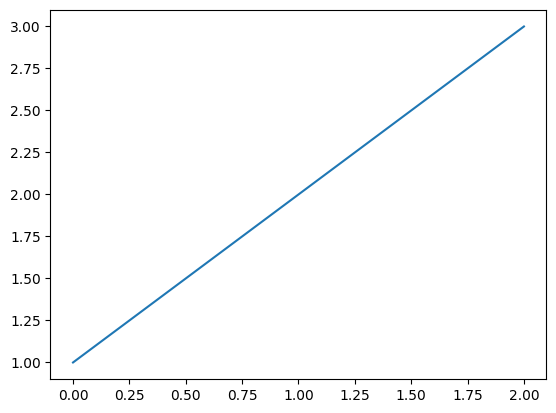

In [8]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3])

El comando `plt.plot([1, 2, 3])` oculta el hecho de que un gráfico es en realidad una jerarquía de objetos de Python anidados.

"Jerarquía" aquí significa que hay una estructura en forma de árbol de objetos de `matplotlib` subyacentes a cada gráfico.

- `Figure`: es el contenedor más externo de `matplotlib`, es como una caja que puede contener varios objetos:
    - `Axes`: Gráfico individual.
        - `Axis`: Son los ejes vertical y horizontal del `Axes`.
        - `Title`: Texto reservado para el título de un `Axes`.
        - ...


<div>
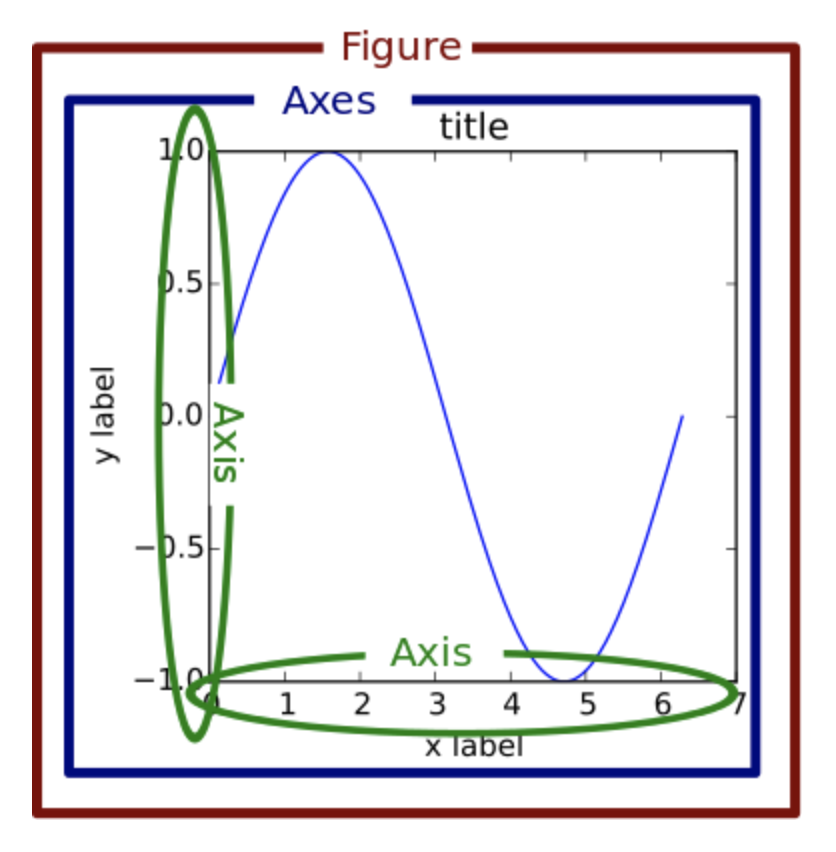
</div>


Esto lo podemos comprobar con el siguiente código:

<class 'matplotlib.figure.Figure'>


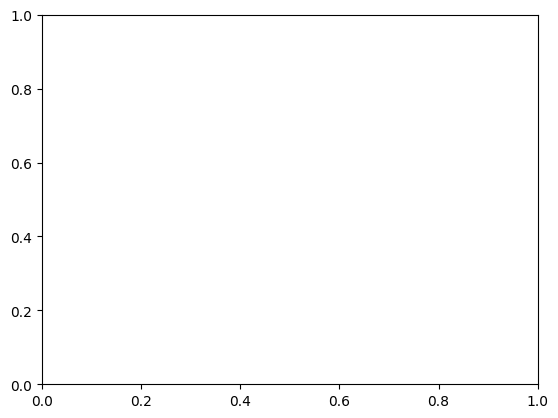

In [2]:
fig, _ = plt.subplots()
print(type(fig))

Arriba creamos dos variables con `plt.subplots()`:

- `fig`: una instancia de la clase `Figure`. 
- `_`: "desechable" que no necesitamos todavía. 

Usando la notación de atributos, es fácil recorrer la jerarquía de la clase `Figure` y ver las clases `Axes`, `Axis` y `YTick`:

In [3]:
fig.axes[0]


<AxesSubplot: >

`fig` tiene varios `Axes`, por eso tomamos el primer elemento de la lista de `Axes` dentro de `fig`.

In [4]:
fig.axes[0].yaxis

Cada `Axes` tiene un eje vertical `YAxis` y un eje horizontal `XAxis`.

In [5]:
fig.axes[0].yaxis.get_major_ticks()[0]

Cada eje tien una colección de *ticks* `YTick` o `XTick` dentro de una lista.

La siguiente imagen muestra la anatomía de una instancia de la clase `Figure`:

<div>
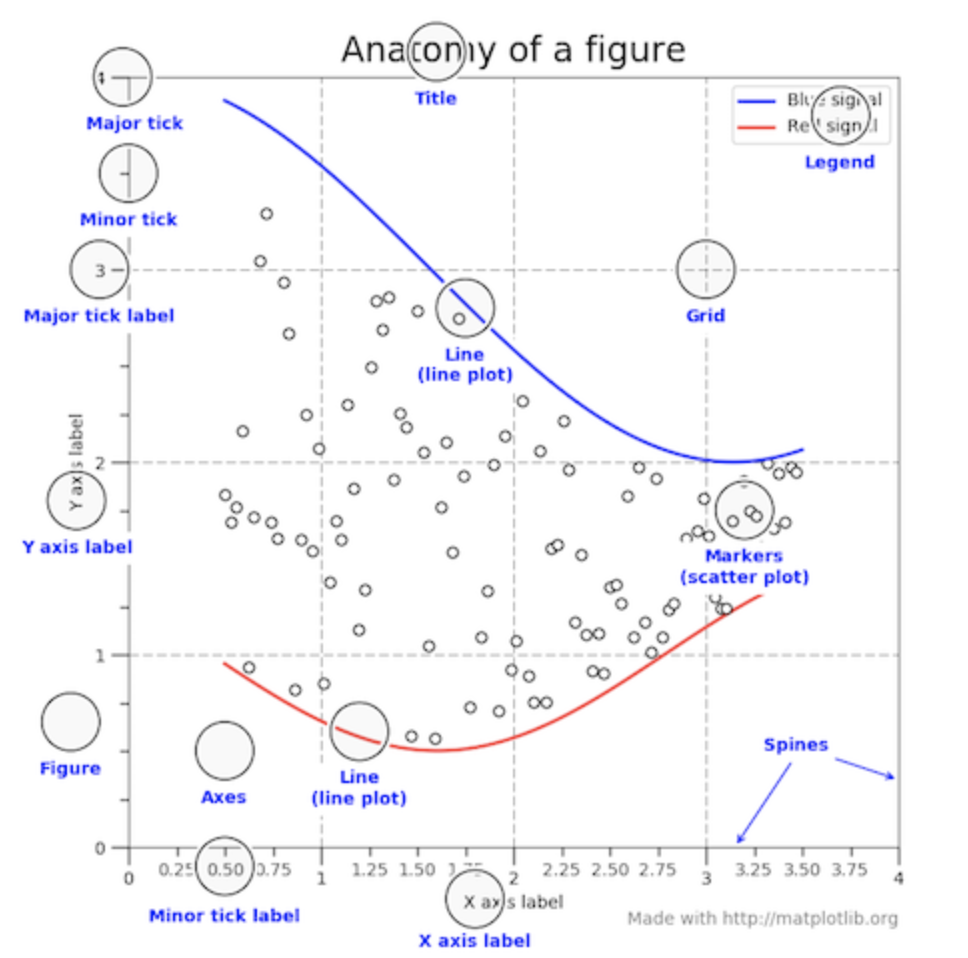
</div>


## Stateful vs Stateless


Casi todas las funciones de pyplot, como `plt.plot()`, se refieren implícitamente a una instancia de la clase `Figure` y `Axes` actuales, o las crean si no existen.

En este sentido *Stateful* significa que cuando llamamos a `plt.plot()` nos estaremos refiriendo siempre a la misma instancia de la clase `Figure` y `Axes` que estemos manipulando en el momento, i.e. no deberemos referirnos a ellas de manera explícita.

La función [`plt.plot()`](https://github.com/matplotlib/matplotlib/blob/v3.6.3/lib/matplotlib/pyplot.py#L2746-L2750) llama a la función `gca()` que regresa una instancia de la clase `Axes` y luego llama al método `plot()` de la clase `Axes`.

``` python
def plot(*args, scalex=True, scaley=True, data=None, **kwargs):
    return gca().plot(
        *args, scalex=scalex, scaley=scaley,
        **({"data": data} if data is not None else {}), **kwargs)
```

La función [`gca()`](https://github.com/matplotlib/matplotlib/blob/c23ccdde6f0f8c071b09a88770e24452f2859e99/lib/matplotlib/pyplot.py#L2244)(*get current axes*) llama a la función `gcf()` que regresa una instancia de la clase `Figure` y luego llama al método `gca()` de la clase `Figure`.


``` python
def gca():
    return gcf().gca()
```

La función [`gfc()`](https://github.com/matplotlib/matplotlib/blob/c23ccdde6f0f8c071b09a88770e24452f2859e99/lib/matplotlib/pyplot.py#L829)  Busca si en el `global namespace` existe ya una instancia de la clase `Figure` y la regresa, en caso contario crea una nueva. 

```python
def gcf():
    """
    Get the current figure.
    If there is currently no figure on the pyplot figure stack, a new one is
    created using `~.pyplot.figure()`.  (To test whether there is currently a
    figure on the pyplot figure stack, check whether `~.pyplot.get_fignums()`
    is empty.)
    """
    manager = _pylab_helpers.Gcf.get_active()
    if manager is not None:
        return manager.canvas.figure
    else:
        return figure()
```

`pyplot` alberga un grupo de funciones que en realidad son solo envolturas de la interfaz orientada a objetos de `matplotlib`.

En este contexto *Stateless* significaría, crear manualmente una instancia de la clase `Figure` y llamar los métodos sobre la instancia creada.


## `plt.subplots()`

En este curso usaremos principalmente el enfoque *Stateless* porque nos permitirá personalizar más los gráficos.

La forma prescrita de crear un `Figure` de un solo `Axes` bajo el enfoque *Stateless* es (no muy intuitivamente) con la función `plt.subplots()`. Esta es realmente la única vez que el enfoque *Stateless* usaremos `pyplot`.


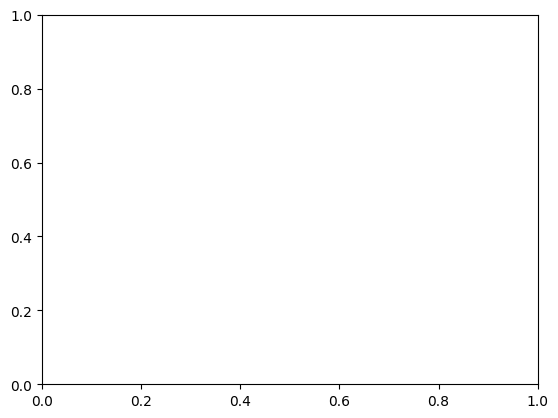

In [7]:
fig, ax = plt.subplots()

Arriba usamos *tuple unpacking* para asignar los dos resultados de plt.subplots() a variables distintas.

La llamada predeterminada de `subplots(nrows=1, ncols=1)`, significa sólo un `AxesSubplot`:

In [8]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

Podemos llamar a sus métodos de instancia para manipular el gráfico:

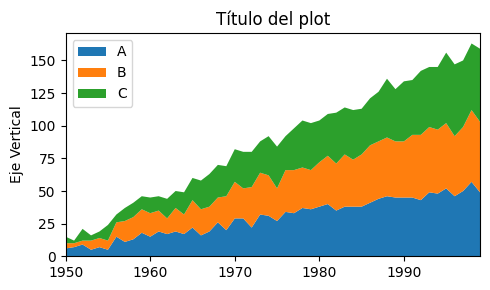

In [6]:
import numpy as np # <- Importamos numpy

rng = np.arange(50)  # <- Creamos un arrag con valores (0, 1, ..., 49)
rnd = np.random.randint(0, 10, size=(3, rng.size)) # <- matriz aleatoria de dim 3 x 50
year = 1950 + rng # <- Creamos los un array con valores (1950, 1951, ..., 1999)

fig, ax = plt.subplots(  # <- instanciamso un Figure y un Axes variando su tamaño
    figsize=(5, 3)
)  
ax.stackplot(           # <- Llamamos al método stackplot de Axes 
    year, rng + rnd,
    labels=['A', 'B', 'C']
)
ax.set_title('Título del plot') # <- Llamamos al método set_title de Axes 
ax.legend(loc='upper left')     # <- Llamamos al método legend de Axes 
ax.set_ylabel('Eje Vertical')
ax.set_xlim(xmin=year[0], xmax=year[-1])
fig.tight_layout()     # <- Ajusta los textos de la imagen para que no se solapen

Veamos un ejemplo con múltiples `Axes` y sólo un `Figure`. 

Graficaremos dos variables aleatorias correlacionadas con [distribución uniforme discreta](https://en.wikipedia.org/wiki/Discrete_uniform_distribution).

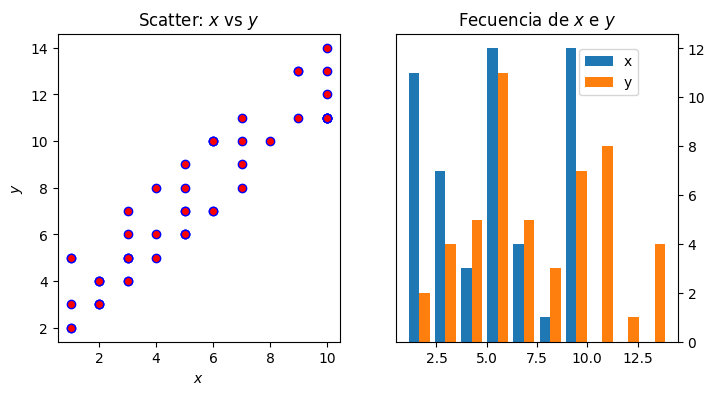

In [8]:
import pandas as pd

x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)

fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(8, 4)
)

ax1.scatter(
    x=x,
    y=y,
    marker='o',
    c='r',
    edgecolor='b'
)
ax1.set_title('Scatter: $x$ vs $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

data = pd.DataFrame(
    data={
        'x': x,
        'y': y
    })

ax2.hist(
    data,
    label=('x', 'y')
)
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Fecuencia de $x$ e $y$')
ax2.yaxis.tick_right()

Recuerdemos que varios `Axes` pueden estar dentro de un `Figure`. En el caso anterior, `fig.axes` nos proporciona una lista de todos los objetos `Axes`:

In [12]:
id(ax1)

4919158048

In [11]:
id(fig.axes[0])

4919158048

Para ilustrar algunas funciones más avanzadas de `subplot` vamos a descargar algunos datos macroeconómicos de vivienda de California.

In [7]:
import numpy as np
from io import BytesIO
import tarfile
from urllib.request import urlopen

#url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
#b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', name="./cal_housing.tgz") as file:
    housing = np.loadtxt(file.extractfile(fpath), delimiter=',')

- **BytesIO**: Una secuencia binaria que utiliza un búfer de bytes en memoria. Búfer es una región de la memoria que se utiliza para almacenar datos temporalmente mientras se mueven de un lugar a otro.
<br>

- **tarfile**: Módulo que permite leer y escribir archivos tar, incluidos los que usan compresión gzip, bz2 y lzma.
<br>

- **urlopen**: Abre una URL.
<br>

- **fpath**: Es la ruta dentro del archivo tar donde están los datos.


- **np.loadtxt**: Lee datos desde el búfer.

Crearemos las siguientes variables:

- y: Valor promedio de la vivienda.
- pop: Población del área.
- age: Edad promedio de las casas del área.

In [10]:
housing

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [9]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

Definiremos una función auxiliar que coloque un cuadro de texto dentro de un `Axes` que servirá como subtítulo.

In [11]:
def add_titlebox(ax: plt.Axes, text) -> plt.Axes:
    """Añade una caja de texto a un Axes."""
    ax.text(
        x=.55,
        y=.8,
        s=text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox={
            'facecolor': 'white',
            'alpha': 0.6},
        fontsize=12.5
    )
    return ax

El módulo `gridspec` de `Matplotlib` permite una mayor personalización de `subplots`. `pyplot.subplot2grid()` interactúa muy bien con este módulo. Digamos que queremos crear un diseño como este:
<br>


<div>
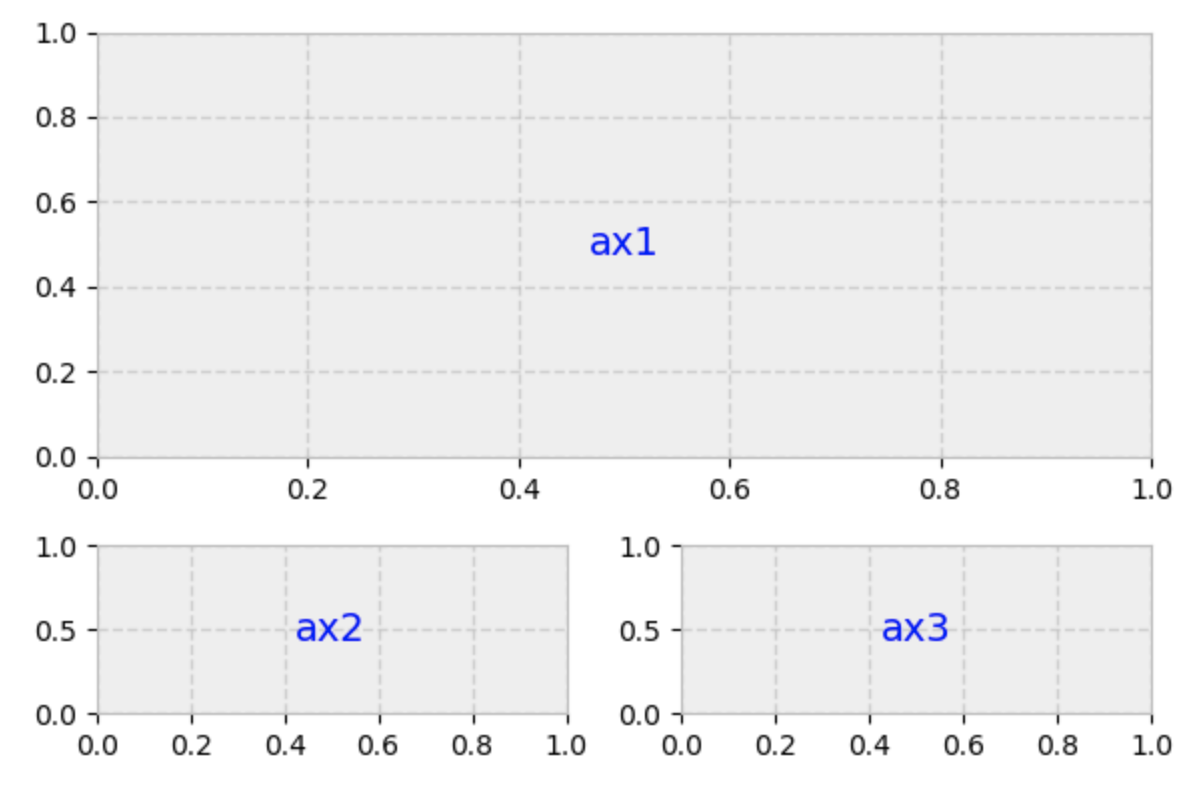
</div>


Lo que en realidad tendremos es una cuadrícula de 3x2 donde `ax1` tiene el doble de alto y ancho que `ax2` y `ax3`, i.e. `ax1` ocupa dos columnas y dos filas.

<div>
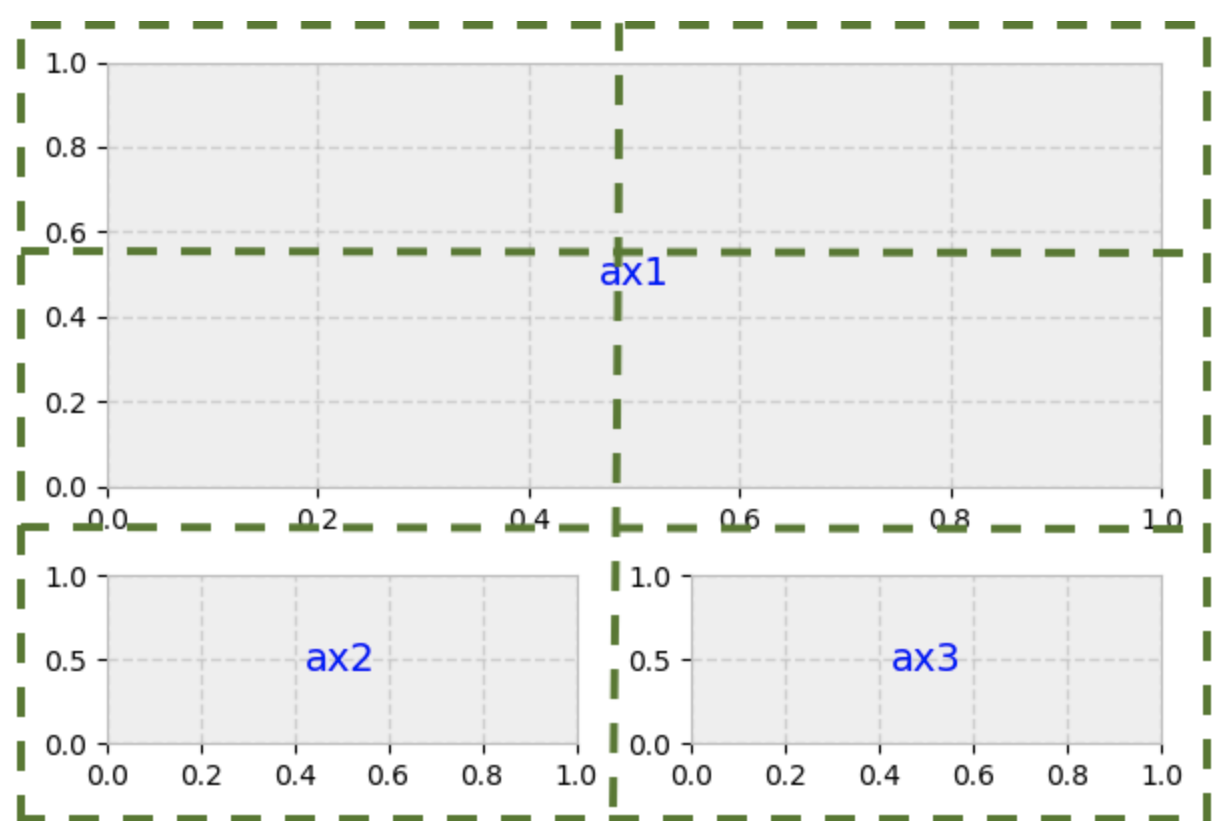
</div>


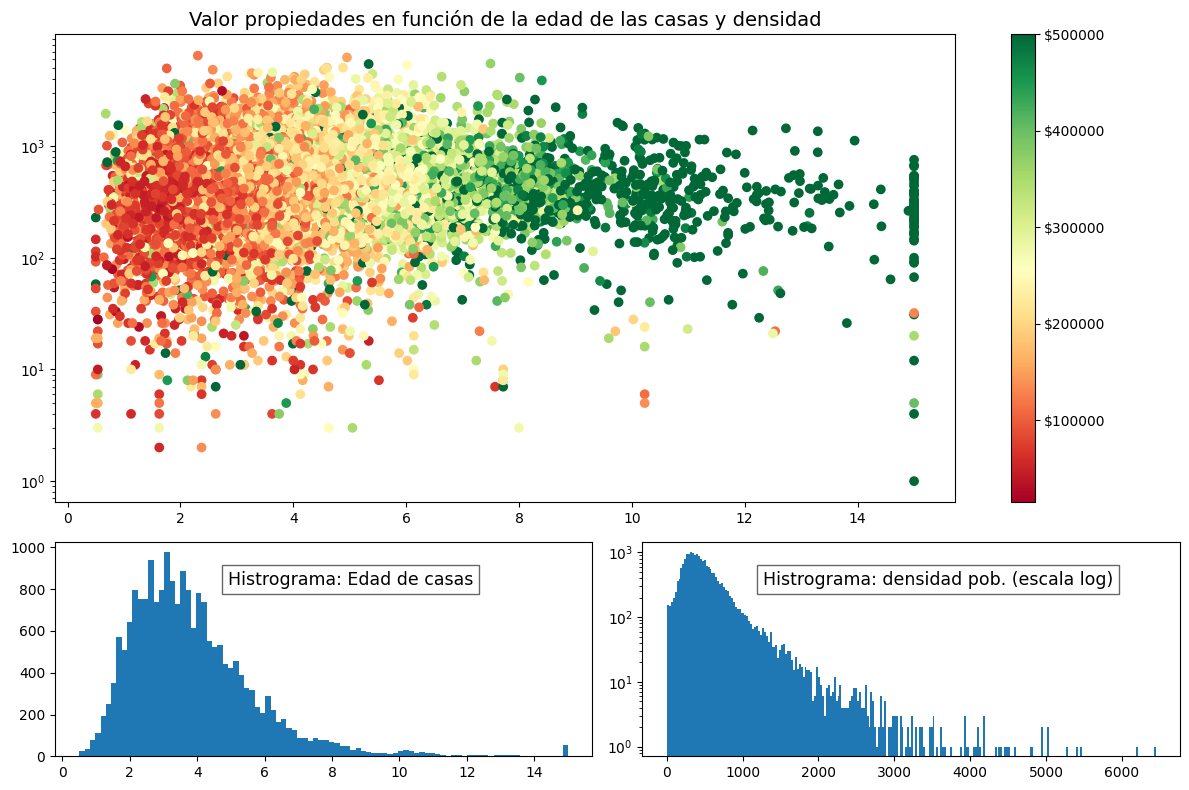

In [12]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

# Añadimos los datos

ax1.set_title('Valor propiedades en función de la edad de las casas y densidad',fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histrograma: Edad de casas')
add_titlebox(ax3, 'Histrograma: densidad pob. (escala log)')
plt.tight_layout()

## Figures

Cada vez que llamamos a `plt.subplots()` se está creando un nuevo objeto de la clase `Figure` que matplotlib guarda en memoria.

Cuando hablamos del enfoque *stateless* hicimos referencia a *current figure* y *current axes* que forma predeterminada serán las instancias de `Figure` y `Axes` mas recientes:

Fig 1 ID: 0x1111fd910
Actual ID de Fig: 0x1111fd910
Fig 2 ID: 0x1112003d0
Actual ID de Fig: 0x1112003d0
Y las Figs creadas son:


[<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>]

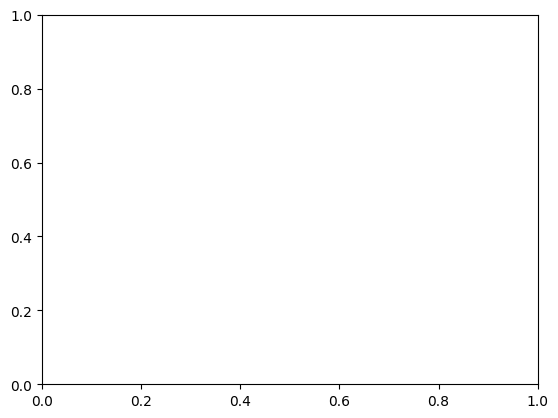

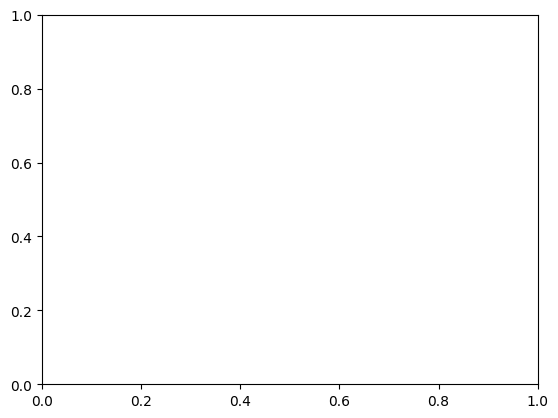

In [13]:
fig1, ax1 = plt.subplots()

print(f"Fig 1 ID: {hex(id(fig1))}")

print(f"Actual ID de Fig: {hex(id(plt.gcf()))}")


fig2, ax2 = plt.subplots()

print(f"Fig 2 ID: {hex(id(fig2))}")

print(f"Actual ID de Fig: {hex(id(plt.gcf()))}")

print("Y las Figs creadas son:")
[plt.figure(i) for i in plt.get_fignums()]

Al ejecutar un script en el que estamos creando un grupo de `Fugures`. Siempre es buena idea cerrar explícitamente cada una para evitar un `MemoryError`:

In [14]:
plt.close('all')